# Trabalho de Banco de Dados - A2
## Análise de dados sobre a antropização de biomas extra-amazônicos 
> #### Alunos:
>
> Amanda de Mendonça Perez
>
> Julia Queiroz Delgado 
>
> Kenner Azevedo 

### Introdução:

Este trabalho tem como objetivo colocar em prática os conceitos estudados na disciplina de Banco de Dados, utilizando um banco de dados (no caso, foi escolhido o MongoDB) para armazenar dados geográficos do tipo .geojson e, a partir disso, realizar uma análise desses dados como o geopandas. 

In [25]:
#pip install -U -q pymongo

In [2]:
import datetime
import pprint

import pymongo
from pymongo import MongoClient

import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [3]:
#connect the database
client = MongoClient('localhost', 27017)
client.list_database_names()

['admin', 'bank', 'config', 'local']

In [4]:
db = client.bank

In [5]:
#ours collections
print(db.list_collection_names())
#we want insert data of states with format { "name" : Nome_estado , "valor" : val}

['data', 'states']


In [6]:
state_s = [{"name": "Acre","value":12},{"name": "Amazonas","value":13},{"name": "Amapá","value":   16},{"name": "Pará",
"value":   15},{"name": "Rondônia","value":   11},{"name": "Roraima","value":   14},{"name": "Tocantins","value":   17}
,{"name": "Alagoas","value":   27},{"name": "Bahia","value":   29},{"name": "Ceará","value":   23},{"name": "Maranhão",
"value":   21},{"name": "Paraíba","value":   25},{"name": "Pernambuco","value":   26},{"name": "Piauí","value":   22},
{"name": "Rio Grande do Norte","value":   24},{"name": "Sergipe","value":   28},{"name": "Espírito Santo","value":   32}
,{"name": "Minas Gerais","value":   31},{"name": "Rio de Janeiro","value":   33},{"name": "São Paulo","value":   35}
,{"name": "Paraná","value":   41},{"name": "Rio Grande do Sul","value":   43},{"name": "Santa Catarina","value":   42}
,{"name": "Distrito Federal","value":   53},{"name": "Goiás","value":   52},{"name": "Mato Grosso","value":   51},
{"name": "Mato Grosso do Sul","value":   50}]

In [7]:
#insert of states
lista_of_ids =[]
for state in range(len(state_s)):
    if(db.states.find_one(state_s[state])): #verifica se o estado ja existe na nossa base de dados
        pass
    else:
        _id = db.states.insert_one(state_s[state]).inserted_id #vai ficar inserindo varias vezes
        index = {'id': _id, "value" : state_s[state]["value"]}
        lista_of_ids.append(index)
print(lista_of_ids)

[]


In [8]:
import json

def read_json(arq_json):
    with open(arq_json, 'r', encoding='utf8') as f:
        return json.load(f)

In [27]:
data = read_json('data_brazilian.json')
mata = read_json('mata_atlantica.json')
pampa = read_json('pampa.json')
pantanal = read_json('pantanal.json')

In [28]:
print(data.keys())
print(mata.keys())
print(pampa.keys())
print(pantanal.keys())

dict_keys(['type', 'features'])
dict_keys(['type', 'totalFeatures', 'features', 'crs'])
dict_keys(['type', 'totalFeatures', 'features', 'crs'])
dict_keys(['type', 'totalFeatures', 'features', 'crs'])


In [20]:
print(db.list_collection_names())

['mata', 'data', 'states']


In [29]:
#Inserindo dados dos arquivos .json no banco de dados
#Dados do Brasil
for i in range(len(data['features'])):
    if(db.data.find_one(data['features'][i])): #verifica se o estado ja existe na nossa base de dados
        pass
    else:
        _id = db.data.insert_one(data['features'][i]).inserted_id #vai ficar inserindo varias vezes
        
#Mata Atlântica
for i in range(len(mata['features'])):
    if(db.mata.find_one(mata['features'][i])): 
        pass
    else:
        _id = db.mata.insert_one(mata['features'][i]).inserted_id 

#Pampa
for i in range(len(pampa['features'])):
    if(db.pampa.find_one(pampa['features'][i])): 
        pass
    else:
        _id = db.pampa.insert_one(pampa['features'][i]).inserted_id 

#Pantanal
for i in range(len(pantanal['features'])):
    if(db.pantanal.find_one(pantanal['features'][i])):
        pass
    else:
        _id = db.pantanal.insert_one(pantanal['features'][i]).inserted_id 

In [22]:
print(db.list_collection_names())
print(client.list_database_names())

['mata', 'pampa', 'data', 'states', 'pantanal']
['admin', 'bank', 'config', 'local']


In [30]:
#Passando os dados do banco para o geopandas
#data, states, mata, pampa, pantanal = db.data, db.states, db.mata, db.pampa, db.pantanal
dados = gpd.GeoDataFrame(list(db.data.find()))
estados = gpd.GeoDataFrame(list(db.states.find()))
mata = gpd.GeoDataFrame(list(db.mata.find()))
#pampa = gpd.GeoDataFrame(list(pampa.find()))
#pantanal = gpd.GeoDataFrame(list(pantanal.find()))

dados_json = list(db.data.find())
mata_json = list(db.mata.find())
print('Dados: \n', 
      dados.head(),
      '\n \n--------------------- \n\nEstados:\n', 
      estados.head(),
      '\n \n--------------------- \n\nMata Atlântica:\n', 
      mata.head())

Dados: 
                         _id     type  \
0  61a18d702ebb3fcebef396df  Feature   
1  61a18d702ebb3fcebef396e0  Feature   
2  61a18d702ebb3fcebef396e1  Feature   
3  61a18d702ebb3fcebef396e2  Feature   
4  61a18d702ebb3fcebef396e3  Feature   

                                          properties  \
0  {'id': '1100015', 'name': 'Alta Floresta D'Oes...   
1  {'id': '1100023', 'name': 'Ariquemes', 'descri...   
2  {'id': '1100031', 'name': 'Cabixi', 'descripti...   
3  {'id': '1100049', 'name': 'Cacoal', 'descripti...   
4  {'id': '1100056', 'name': 'Cerejeiras', 'descr...   

                                            geometry  
0  {'type': 'Polygon', 'coordinates': [[[-62.1820...  
1  {'type': 'Polygon', 'coordinates': [[[-62.5359...  
2  {'type': 'Polygon', 'coordinates': [[[-60.3993...  
3  {'type': 'Polygon', 'coordinates': [[[-61.0005...  
4  {'type': 'Polygon', 'coordinates': [[[-61.5004...   
 
--------------------- 

Estados:
                         _id       name  value


In [52]:
parsed_data1 = [[item['properties']['id'],
                item['properties']['name'],
                item['properties']['description'],
                Polygon(item['geometry']['coordinates'][0])] for item in dados_json]
dados = gpd.GeoDataFrame(data=parsed_data1, columns=['id', 'name', 'description', 'geometry'])

print(dados.head())

        id                   name            description  \
0  1100015  Alta Floresta D'Oeste  Alta Floresta D'Oeste   
1  1100023              Ariquemes              Ariquemes   
2  1100031                 Cabixi                 Cabixi   
3  1100049                 Cacoal                 Cacoal   
4  1100056             Cerejeiras             Cerejeiras   

                                            geometry  
0  POLYGON ((-62.18209 -11.86686, -62.16230 -11.8...  
1  POLYGON ((-62.53595 -9.73182, -62.50782 -9.754...  
2  POLYGON ((-60.39940 -13.45584, -60.40195 -13.4...  
3  POLYGON ((-61.00051 -11.39796, -61.01794 -11.4...  
4  POLYGON ((-61.50047 -13.00392, -61.47901 -13.0...  


In [64]:
parsed_data2 = [[item['properties']['cena'],
                 item['properties']['bioma'],
                 item['properties']['ano_des'],
                 item['properties']['fonte'],
                 item['properties']['mi'],
                 item['properties']['uf'],
                 item['properties']['geocodigo'],
                 item['properties']['nome'],
                 item['properties']['area_km2'],
                 item['properties']['area_ha'],
                 item['properties']['sigla'],
                 Polygon(item['geometry']['coordinates'][0][0])] for item in mata_json]
mata_atl = gpd.GeoDataFrame(data=parsed_data2, columns=['cena', 'bioma', 'ano_des', 'fonte', 'mi',
                                                        'uf', 'geocodigo', 'nome', 'area_km2', 
                                                        'area_ha', 'sigla', 'geometry'])
print(mata_atl.head())

   cena           bioma    ano_des          fonte    mi    uf geocodigo  nome  \
0  None  MATA ATLANTICA  2008-2009  CSR-IBAMA/MMA  0484  None      None  None   
1  None  MATA ATLANTICA  2008-2009  CSR-IBAMA/MMA  0311  None      None  None   
2  None  MATA ATLANTICA  2008-2009  CSR-IBAMA/MMA  0524  None      None  None   
3  None  MATA ATLANTICA  2008-2009  CSR-IBAMA/MMA  0512  None      None  None   
4  None  MATA ATLANTICA  2008-2009  CSR-IBAMA/MMA  0512  None      None  None   

   area_km2    area_ha  sigla  \
0  0.030350   3.034984     16   
1  0.243253  24.325302     26   
2  0.013686   1.368646     24   
3  0.473125  47.312505     16   
4  0.035466   3.546567     16   

                                            geometry  
0  POLYGON ((-52.66560 -22.95643, -52.66549 -22.9...  
1  POLYGON ((-37.52531 -10.63018, -37.52531 -10.6...  
2  POLYGON ((-48.98269 -27.71053, -48.98325 -27.7...  
3  POLYGON ((-51.47638 -25.88918, -51.47555 -25.8...  
4  POLYGON ((-51.10627 -25.48408, -51.1

In [45]:
dados['uf_code'] = dados['id'].map(str)
for i in range (0, dados['id'].size):
    dados.loc[i,'uf_code'] = int(dados['uf_code'].iloc[i][:2])
dados.head()

,id,name,description,geometry,uf_code
0,1100015,Alta Floresta D'Oeste,Alta Floresta D'Oeste,"POLYGON ((-62.18209 -11.86686, -62.16230 -11.8...",11
1,1100023,Ariquemes,Ariquemes,"POLYGON ((-62.53595 -9.73182, -62.50782 -9.754...",11
2,1100031,Cabixi,Cabixi,"POLYGON ((-60.39940 -13.45584, -60.40195 -13.4...",11
3,1100049,Cacoal,Cacoal,"POLYGON ((-61.00051 -11.39796, -61.01794 -11.4...",11
4,1100056,Cerejeiras,Cerejeiras,"POLYGON ((-61.50047 -13.00392, -61.47901 -13.0...",11


In [46]:
def plot_map(cor, estado=None): 
    if estado == None:
        dados.plot(color=cor, edgecolor=cor, figsize=(20, 10))
        plt.xticks(())
        plt.yticks(())
        plt.show()
    else:
        a = dados[dados.uf_code == uf].plot(color=cor, edgecolor='black', figsize=(20, 10))
        plt.xticks(())
        plt.yticks(())
        plt.show()

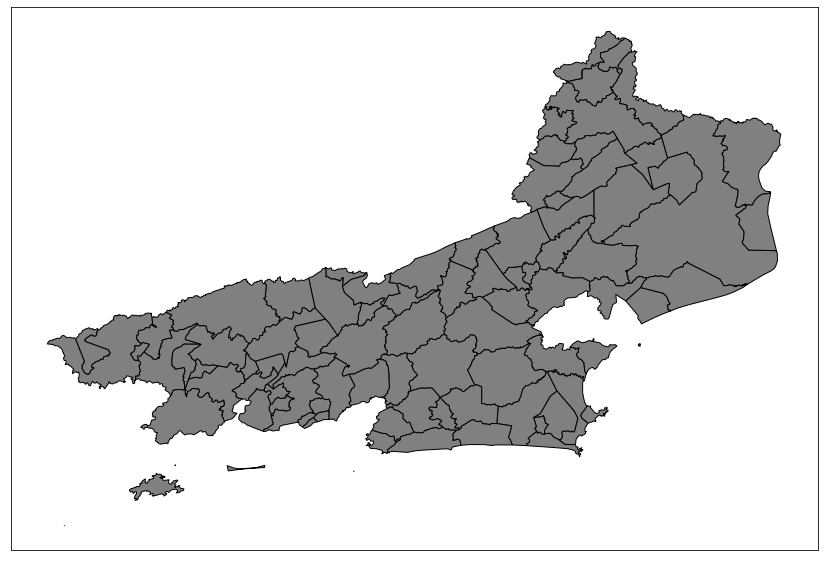

In [47]:
estado = "Rio de Janeiro"
uf = estados[estados.name == estado]['value'].values[0]
cor = "grey"
plot_map(cor, uf)

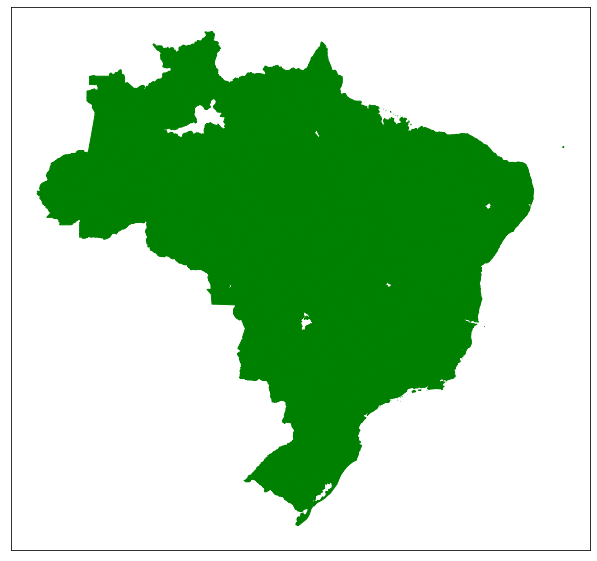

In [48]:
cor = 'green'
plot_map(cor)

Fonte dos dados das populações de cada município em 2009: <https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html>

In [282]:
populacao = pd.read_csv('UF_Municipio.csv', sep = ';', encoding = 'utf8')
populacao_por_estado = pd.read_csv('UF_populacoes.csv', sep = ';', encoding = 'utf8')

In [283]:
print(populacao.head())
print('\n\n')
print(populacao_por_estado.head())
print('\n\n')
print(estados)
#estados.head()

   uf  cod_uf  cod                     name  populacao  Unnamed: 5
0  RO      11   15    Alta Floresta D'Oeste      24354         NaN
1  RO      11  379  Alto Alegre dos Parecis      11875         NaN
2  RO      11  403             Alto Paraíso      17569         NaN
3  RO      11  346         Alvorada D'Oeste      17127         NaN
4  RO      11   23                Ariquemes      85541         NaN



         regiao  populacao
0      Rondônia    1503928
1          Acre     691132
2      Amazonas    3393369
3       Roraima     421499
4          Pará    7431020



                         _id                 name  value
0   61a18d5e2ebb3fcebef396c4                 Acre     12
1   61a18d5e2ebb3fcebef396c5             Amazonas     13
2   61a18d5e2ebb3fcebef396c6                Amapá     16
3   61a18d5e2ebb3fcebef396c7                 Pará     15
4   61a18d5e2ebb3fcebef396c8            Rondônia      11
5   61a18d5e2ebb3fcebef396c9              Roraima     14
6   61a18d5e2ebb3fcebef396ca   

In [284]:
populacao_por_estado = populacao_por_estado.rename(columns={'regiao': 'name'})

In [291]:
import numpy as np
estados.head()
populacao_por_estado['value'] = ''
#for i in range (0, populacao_por_estado['name'].size):
#    populacao_por_estado['value'][i] =  
#populacao_por_estado.head()
np.array(populacao_por_estado['name']).tolist()
lista = [x.lstrip() for x in np.array(populacao_por_estado['name']).tolist()]
#for elemento in lista:
    #print(elemento)
    #populacao_por_estado.loc[elemento,'value'] = estados[estados['name'] == elemento]['value'].to_numpy()[0]
    #populacao_por_estado['value'] = estados[estados['name'] == elemento]['value'].to_numpy()[0]
#print(estados['name'])
populacao_por_estado['value'].iloc[0]
    #populacao_por_estado['value'] = estados[estados['name'] == element]['value'][0]
#estados[estados['name'] == 'Acre']['value'][0]
populacao_por_estado.loc[0,'name']
#estados['name']

'    Rondônia'

In [214]:
a = [1,2,1]
len(a)

3

In [123]:
pop = populacao.drop(columns=['Unnamed: 5'])
#pop = pop.rename(columns={'SIGLA': 'uf', 'COD_UF': 'cod_uf', 'COD': 'cod',
#                          'NOMES': 'name', 'ESTIMADA': 'populacao'})
pop.head()
#pop[pop['NOMES'] == 'Londrina']

,uf,cod_uf,cod,name,populacao
0,RO,11,15,Alta Floresta D'Oeste,24354
1,RO,11,379,Alto Alegre dos Parecis,11875
2,RO,11,403,Alto Paraíso,17569
3,RO,11,346,Alvorada D'Oeste,17127
4,RO,11,23,Ariquemes,85541


In [124]:
dados_pop = dados.merge(pop, how='left', on='name')
dados_pop['populacao'][0]
#dados_pop['populacao'] = dados_pop['populacao'].map(int)

24354.0

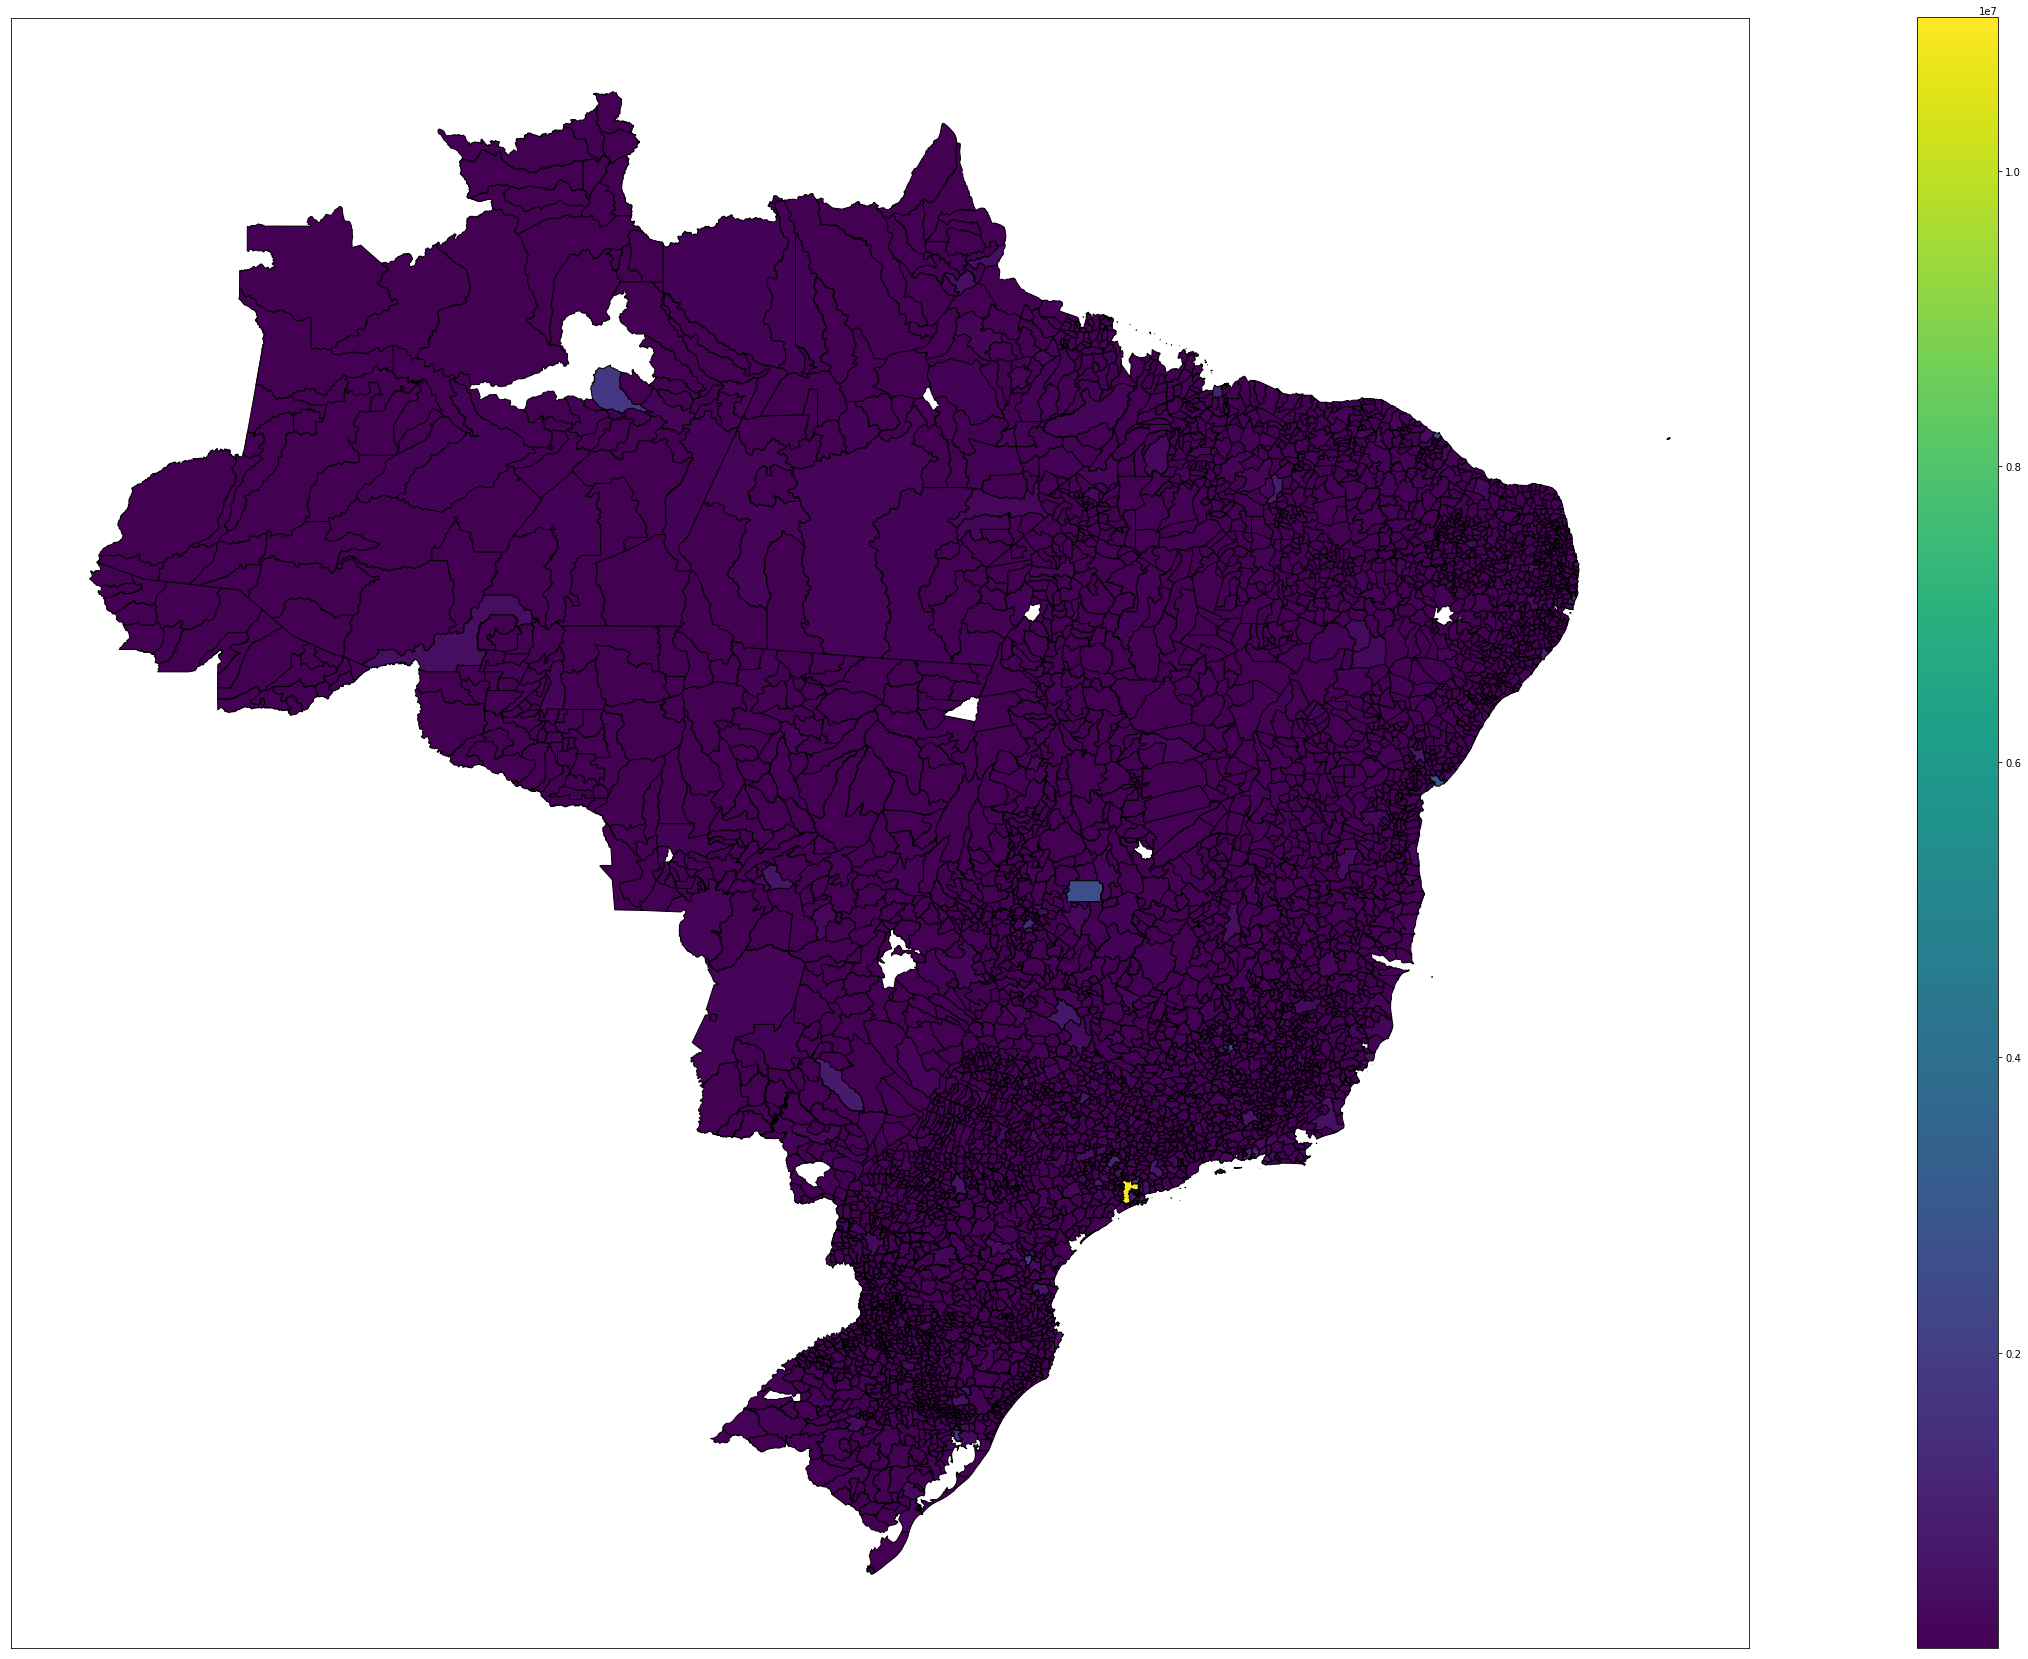

In [138]:
parana = dados_pop[dados_pop['uf_code'] == uf]
dados_pop.plot(column = 'populacao', 
            legend = True, 
            figsize = (60,30),
            edgecolor='black',
            cmap = 'viridis') 
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
from plotly import graph_objects as go

#Create figure object
fig = go.Figure(
    go.Choroplethmapbox(
        geojson = geo_taiwan, #Assign geojson file
        featureidkey = "properties.COUNTYNAME", #Assign feature key
        locations = Dataset["City/County"], #Assign location data
        z = Dataset["Population"], #Assign information data
        zauto = True,
        colorscale = 'viridis',
        showscale = True,
    )
)

#Update layout
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 6, #Zoom in scale
    mapbox_center = {"lat": 23.9, "lon": 121.52}, #Center location of the map
)

AttributeError: 'Line2D' object has no property 'column'

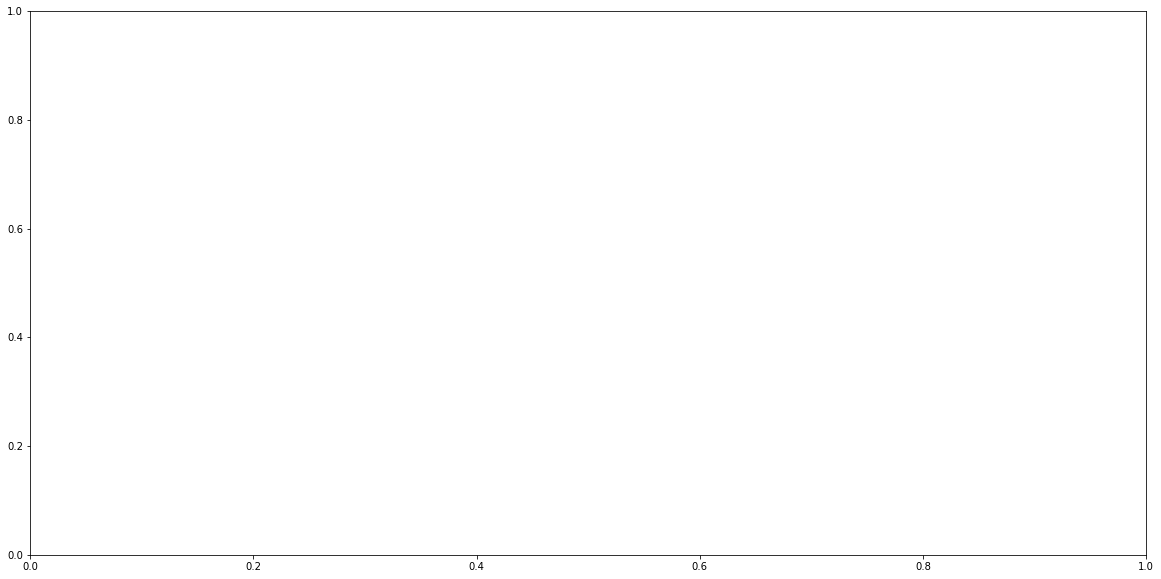

In [79]:
populacao_por_estado.plot(column = 'populacao', 
                          legend = True, 
                          figsize = (20,10),
                          cmap = 'magma') 
plt.xticks(())
plt.yticks(())
plt.show()